In [1]:
import matplotlib.pyplot as plt
from numpy import *

## 训练算法：使用梯度上升找到最佳参数

In [27]:
def loadDataSet():
    # 创建两个列表
    dataMat = []
    labelMat = []
    # 打开文本数据集
    fr = open('testSet.txt')
    # 遍历文本的每一行
    for line in fr.readlines():
        # 对当前行去除首尾空格，并按空格进行分离
        lineArr = line.strip().split()
        # 将每一行的两个特征x1，x2，加上x0=1,组成列表并添加到数据集列表中
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        # 将当前行标签添加到标签列表
        labelMat.append(int(lineArr[2]))
    # 返回数据列表，标签列表
    return dataMat, labelMat

# 定义sigmoid函数
def sigmoid(inx):
    if inx>=0:      #对sigmoid函数的优化，避免了出现极大的数据溢出
        return 1.0/(1+exp(-inx))
    else:
        return exp(inx)/(1+exp(inx))
    
#用于矩阵的sigmoid函数
def sigmoid0(inX):
              return longfloat(1.0/(1+exp(-inX)))

# 梯度上升法更新最优拟合参数
def gradAscent(dataMat, classLabels):
    # 将数据集列表转为Numpy矩阵
    dataMatrix = mat(dataMat)
    # 将数据集标签列表转为Numpy矩阵，并转置
    labelMat = mat(classLabels).transpose()
    # 获取数据集矩阵的行数和列数
    m, n = shape(dataMat)
    # 学习步长
    alpha = 0.001
    # 最大迭代次数
    maxCycles = 1000
    # 初始化权值参数向量每个维度均为1.0
    weights = ones((n, 1))
    # 循环迭代次数
    for k in range(maxCycles):
        # 求当前的sigmoid函数预测概率
        h = sigmoid0(dataMatrix*weights)
        # 计算真实类别和预测类别的差值
        # 对logistic回归函数的对数似然函数的参数项求偏导
        error = (labelMat-h)
        # 更新权值参数
        weights = weights+alpha*dataMatrix.transpose()*error
    return weights

In [28]:
dataArr,labelMat=loadDataSet()

In [29]:
weights=gradAscent(dataArr,labelMat)
weights

matrix([[ 5.43822336],
        [ 0.58605575],
        [-0.78334895]])

## 分析数据，画出决策边界

In [30]:
def plotBestFit(weights):  
    import matplotlib.pyplot as plt  
    dataMat, labelMat = loadDataSet()  
    dataArr = array(dataMat)  
    n = shape(dataArr)[0]  
    xcord1 = []; ycord1 = []  
    xcord2 = []; ycord2 = []  
    for i in range(n):  
        if int(labelMat[i]) == 1:  
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])  
        else: xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])  
    fig = plt.figure(figsize=(10,8))  
    ax = fig.add_subplot(111)  
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker='s')  
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')  
    x = arange(-3.0, 3.0, 0.1)  
    y = (-weights[0]-weights[1]*x)/weights[2]  
    ax.plot(x, y)  
    plt.xlabel('X1');  
    plt.ylabel('X2');  
    plt.show()

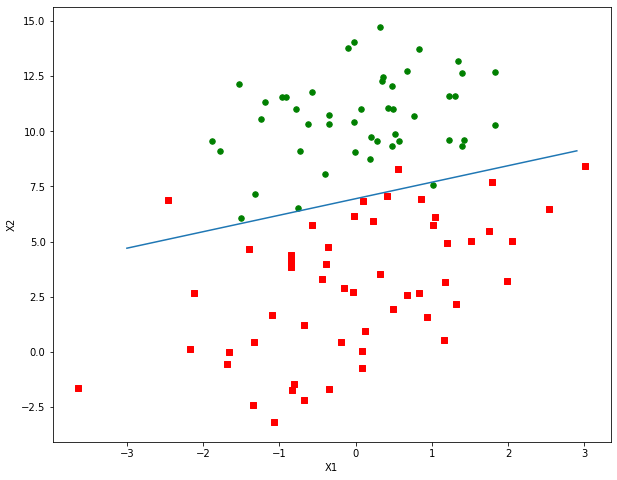

In [31]:
plotBestFit(array(weights))

## 训练算法：随机梯度上升

### 假随机

In [32]:
def stocGradAscent0(dataMatrix, classLabels):
    # 为便于计算，转为Numpy数组
    dataMat = array(dataMatrix)  #获取数据集的行数和列数
    m, n = shape(dataMatrix)
    # 初始化权值向量各个参数为1.0
    weights = ones(n)
    # 设置步长为0.01
    alpha = 0.001
    # 循环m次，每次选取数据集一个样本更新参数
    for i in range(m):
        # 计算当前样本的sigmoid函数值
        h = sigmoid(sum(dataMatrix[i]*weights))
        # 计算当前样本的残差(代替梯度)
        error = (classLabels[i]-h)
        # 更新权值参数
        weights = weights+alpha*error*dataMatrix[i]
    return weights

In [33]:
weights=stocGradAscent0(array(dataArr),labelMat)
weights

array([0.963951  , 0.9826866 , 0.49153886])

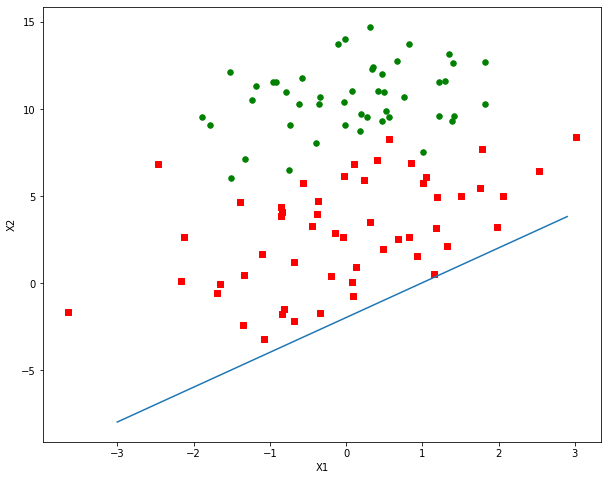

In [26]:
plotBestFit(weights)

### 真随机

In [10]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    # 获取数据集的行数和列数
    m, n = shape(dataMatrix)
    # 初始化权值参数向量每个维度均为1
    weights = ones(n)
    # 循环每次迭代次数
    for j in range(numIter):
        # 获取数据集行下标列表
        dataIndex = list(range(m))
        # 遍历行列表
        for i in range(m):
            # 每次更新参数时设置动态的步长，且为保证多次迭代后对新数据仍然具有一定影响
            # 添加了固定步长0.1
            alpha = 4/(1.0+j+i)+0.01
#             alpha=0.01
            # 随机获取样本
            randomIndex = int(random.uniform(0, len(dataIndex)))
            # 计算当前sigmoid函数值
            h = sigmoid(sum(dataMatrix[randomIndex]*weights))
            # 计算权值更新
            error = classLabels[randomIndex]-h
            weights = weights+alpha*error*dataMatrix[randomIndex]
            # 选取该样本后，将该样本下标删除，确保每次迭代时只使用一次
            del(dataIndex[randomIndex])
    return weights


In [11]:
weights=stocGradAscent1(array(dataArr),labelMat)
weights

array([14.15359453,  0.70676413, -2.16548972])

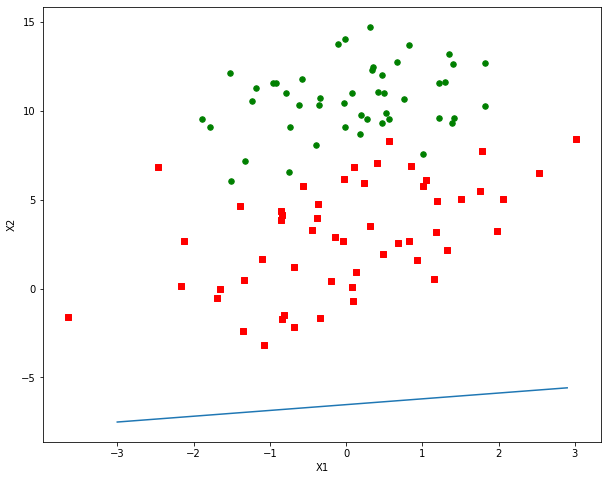

In [12]:
plotBestFit(weights)

### 小批量随机梯度上升

In [13]:
def BMAD(dataMat, classLabels, numIter=1000,batch_size=70):
    # 将数据集列表转为Numpy矩阵
    dataMatrix = mat(dataMat)
    # 将数据集标签列表转为Numpy矩阵，并转置
    labelMat = mat(classLabels).transpose() 
      # 获取数据集的行数和列数
    m, n = shape(dataMat)
    # 初始化权值参数向量每个维度均为1
    weights = ones((n,1))
    # 循环每次迭代次数
    alpha=0.001
    for epoch in range(numIter): # 获取数据集行下标列表
        for i in range(0,m,batch_size):
            batchdata = dataMatrix[i:batch_size,:]  #batch_size*n
            target = labelMat[i:batch_size,:]  #batch_size*1
            h = sigmoid0(batchdata*weights)  #batch_size*1
            # 计算权值更新
            error = target-h
            weights +=alpha*batchdata.transpose()*error
    return weights

In [14]:
weights=BMAD(array(dataArr),labelMat)
weights

array([[ 4.79298375],
       [ 0.50256264],
       [-0.67675596]])

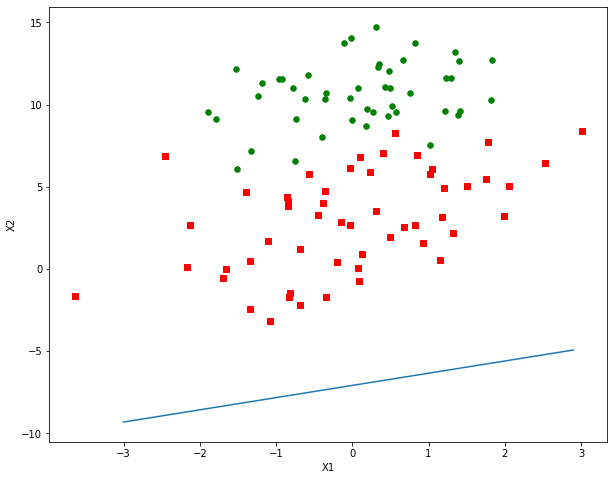

In [15]:
plotBestFit(array(weights))

### 查看回归系数与迭代次数的关系

In [16]:
from matplotlib.font_manager import FontProperties
def plotWeights(weights_array1,weights_array2):
    #设置汉字格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=3,nclos=2时,代表fig画布被分为六个区域,axs[0][0]表示第一行第一列
    fig, axs = plt.subplots(nrows=3, ncols=2,sharex=False, sharey=False, figsize=(20,10))
    x1 = arange(0, len(weights_array1), 1)
    #绘制w0与迭代次数的关系
    axs[0][0].plot(x1,weights_array1[:,0])
    axs0_title_text = axs[0][0].set_title(u'梯度上升算法：回归系数与迭代次数关系',FontProperties=font)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'W0',FontProperties=font)
    plt.setp(axs0_title_text, size=20, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=20, weight='bold', color='black')
    #绘制w1与迭代次数的关系
    axs[1][0].plot(x1,weights_array1[:,1])
    axs1_ylabel_text = axs[1][0].set_ylabel(u'W1',FontProperties=font)
    plt.setp(axs1_ylabel_text, size=20, weight='bold', color='black')
    #绘制w2与迭代次数的关系
    axs[2][0].plot(x1,weights_array1[:,2])
    axs2_xlabel_text = axs[2][0].set_xlabel(u'迭代次数',FontProperties=font)
    axs2_ylabel_text = axs[2][0].set_ylabel(u'W1',FontProperties=font)
    plt.setp(axs2_xlabel_text, size=20, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=20, weight='bold', color='black')


    x2 = arange(0, len(weights_array2), 1)
    #绘制w0与迭代次数的关系
    axs[0][1].plot(x2,weights_array2[:,0])
    axs0_title_text = axs[0][1].set_title(u'改进的假随机梯度上升算法：回归系数与迭代次数关系',FontProperties=font)
    axs0_ylabel_text = axs[0][1].set_ylabel(u'W0',FontProperties=font)
    plt.setp(axs0_title_text, size=20, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=20, weight='bold', color='black')
    #绘制w1与迭代次数的关系
    axs[1][1].plot(x2,weights_array2[:,1])
    axs1_ylabel_text = axs[1][1].set_ylabel(u'W1',FontProperties=font)
    plt.setp(axs1_ylabel_text, size=20, weight='bold', color='black')
    #绘制w2与迭代次数的关系
    axs[2][1].plot(x2,weights_array2[:,2])
    axs2_xlabel_text = axs[2][1].set_xlabel(u'迭代次数',FontProperties=font)
    axs2_ylabel_text = axs[2][1].set_ylabel(u'W1',FontProperties=font)
    plt.setp(axs2_xlabel_text, size=20, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=20, weight='bold', color='black')

    plt.show()      


In [17]:
def gradAscentPlot(dataMat, classLabels):
    # 将数据集列表转为Numpy矩阵
    dataMatrix = mat(dataMat)
    # 将数据集标签列表转为Numpy矩阵，并转置
    labelMat = mat(classLabels).transpose()
    # 获取数据集矩阵的行数和列数
    m, n = shape(dataMat)
    # 学习步长
    alpha = 0.001
    # 最大迭代次数
    maxCycles = 20000
    # 初始化权值参数向量每个维度均为1.0
    weights = ones((n, 1))
    weights_array = array([])
    # 循环迭代次数
    for k in range(maxCycles):
        # 求当前的sigmoid函数预测概率
        h = sigmoid0(dataMatrix*weights)
        # 计算真实类别和预测类别的差值
        # 对logistic回归函数的对数似然函数的参数项求偏导
        error = (labelMat-h)
        # 更新权值参数
        weights = weights+alpha*dataMatrix.transpose()*error
        weights_array = append(weights_array,weights)
    weights_array = weights_array.reshape(maxCycles,n)
    return weights,weights_array

def stocGradAscentPlot(dataMatrix, classLabels):
    # 为便于计算，转为Numpy数组
    dataMat = array(dataMatrix)  #获取数据集的行数和列数
    m, n = shape(dataMatrix)
    # 初始化权值向量各个参数为1.0
    weights = ones(n)
    weights_array = array([])
    # 设置步长为0.01
    alpha = 0.01
    # 循环m次，每次选取数据集一个样本更新参数
    iternum=200
    for j in range(iternum):
        for i in range(m):
            # 计算当前样本的sigmoid函数值
            h = sigmoid(sum(dataMatrix[i]*weights))
            # 计算当前样本的残差(代替梯度)
            error = (classLabels[i]-h)
            # 更新权值参数
            weights = weights+alpha*error*dataMatrix[i]
            weights_array = append(weights_array,weights,axis=0)   #添加回归系数到数组中
    weights_array=weights_array.reshape(m*iternum,n)
    return weights,weights_array

# numIter：迭代次数，默认150
def stocGradAscent1Plot(dataMatrix, classLabels, numIter=150):
    # 获取数据集的行数和列数
    m, n = shape(dataMatrix)
    # 初始化权值参数向量每个维度均为1
    weights = ones(n)
    weights_array = array([])
    # 循环每次迭代次数
    for j in range(numIter):
        # 获取数据集行下标列表
        dataIndex = list(range(m))
        # 遍历行列表
        for i in range(m):
            # 每次更新参数时设置动态的步长，且为保证多次迭代后对新数据仍然具有一定影响
            # 添加了固定步长0.1
            alpha = 4/(1.0+j+i)+0.01
            # 随机获取样本
            randomIndex = int(random.uniform(0, len(dataIndex)))
            # 计算当前sigmoid函数值
            h = sigmoid(sum(dataMatrix[randomIndex]*weights))
            # 计算权值更新
            error = classLabels[randomIndex]-h
            weights = weights+alpha*error*dataMatrix[randomIndex]
            weights_array = append(weights_array,weights,axis=0)   #添加回归系数到数组中
            # 选取该样本后，将该样本下标删除，确保每次迭代时只使用一次
            del(dataIndex[randomIndex])
    weights_array = weights_array.reshape(numIter*m,n)
    return weights,weights_array


AttributeError: 'Text' object has no property 'FontProperties'

D:\ProgramFiles\python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26799 (\N{CJK UNIFIED IDEOGRAPH-68AF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramFiles\python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramFiles\python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramFiles\python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21319 (\N{CJK UNIFIED IDEOGRAPH-5347}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramFiles\python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31639 (\N{CJK UNIFIED IDEOGRAPH-7B97}) missing from current font.
  fig.canvas.print_figure(bytes_

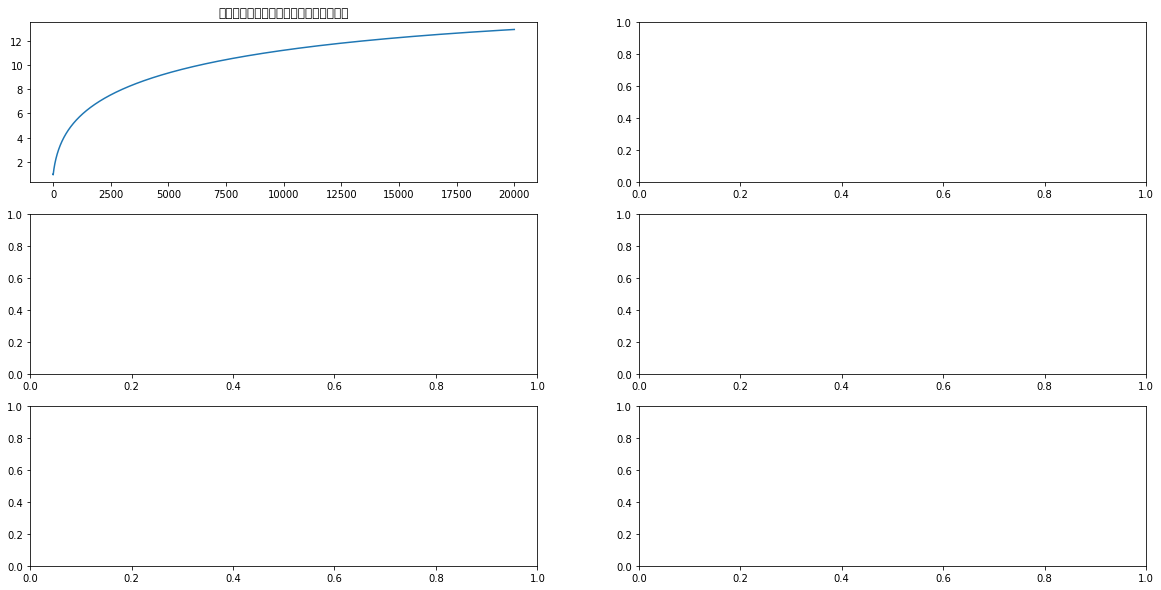

In [18]:
dataMat, labelMat = loadDataSet()           
weights1,weights_array1 = gradAscentPlot(dataMat, labelMat)
weights2,weights_array2 = stocGradAscentPlot(array(dataMat), labelMat)
len(weights_array1),len(weights_array2)
plotWeights(weights_array1, weights_array2)

## 从疝气病预测病马的死亡率

### 数据预处理：归一化

In [ ]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)  #按列求最小值
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))
    #element wise divide
    return normDataSet, ranges, minVals

### 构建logistic回归分类器（未归一化）

In [ ]:
#分类决策函数
def clasifyVector(inX, weights):
    # 计算logistic回归预测概率
    prob = sigmoid(sum(inX*weights))
    # 大于0.5预测为1
    if prob > 0.5:
        return 1.0
    # 否则预测为0
    else:
        return 0.0

# logistic回归预测算法
def colicTest():
    # 打开训练数据集
    frTrain = open('horseColicTraining.txt')
    # 打开测试数据集
    frTest = open('horseColicTest.txt')
    # 新建两个空列表，用于保存训练数据集和标签
    trainingSet = []
    trainingLabels = []
    # 读取训练集文档的每一行
    for line in frTrain.readlines():
        # 对当前行进行特征分割
        currLine = line.strip().split('\t')
        # 新建列表存储每个样本的特征向量
        lineArr = []
        # 遍历每个样本的特征
        for i in range(21):
            #             将该样本的特征存入lineArr列表
            lineArr.append(float(currLine[i]))
        # 将该样本标签存入标签列表
        trainingLabels.append(float(currLine[21]))
        # 将该样本的特征向量添加到数据集列表
        trainingSet.append(lineArr)
    # 调用随机梯度上升法更新logistic回归的权值参数
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 10000)
#     trainWeights = gradAscent(trainingSet, trainingLabels)
#     trainWeights = BMAD(array(trainingSet), trainingLabels,10000,30)
    # 统计测试数据集预测错误样本数量和样本总数
    errorCount = 0
    numTestVec = 0.0
    # 遍历测试数据集的每个样本
    for line in frTest.readlines():
        # 样本总数加1
        numTestVec += 1.0
        # 对当前行进行处理，分割出各个特征及样本标签
        currLine = line.strip().split('\t')
        # 新建特征向量
        lineArr = []
        # 将各个特征构成特征向量
        for i in range(21):
            lineArr.append(float(currLine[i]))
        # 利用分类预测函数对该样本进行预测，并与样本标签进行比较
        if int(clasifyVector(array(lineArr), trainWeights)) != int(currLine[21]):
            # 如果预测错误，错误数加1
            errorCount += 1
    # 计算测试集总的预测错误率
    errorRate = (float(errorCount)/numTestVec)
    # 打印错误率大小
    print('the error rate of this test is: %f' % (errorRate))
    # 返回错误率
    return errorRate

# 多次测试算法求取预测误差平均值
def multTest():
    # 设置测试次数为10次，并统计错误率总和
    numTests = 10
    errorRateSum = 0.0
    # 每一次测试算法并统计错误率
    for k in range(numTests):
        errorRateSum += colicTest()
    # 打印出测试10次预测错误率平均值
    print('after %d iterations the average error rate is: %f' %
          (numTests, errorRateSum/float(numTests)))

In [ ]:
multTest()

### 构建logistic回归分类器（归一化）

In [ ]:
# logistic回归预测算法
def colicTest0():
    # 打开训练数据集
    frTrain = open('horseColicTraining.txt')
    # 打开测试数据集
    frTest = open('horseColicTest.txt')
    # 新建两个空列表，用于保存训练数据集和标签
    trainingSet = []
    trainingLabels = []
    # 读取训练集文档的每一行
    for line in frTrain.readlines():
        # 对当前行进行特征分割
        currLine = line.strip().split('\t')
        # 新建列表存储每个样本的特征向量
        lineArr = []
        # 遍历每个样本的特征
        for i in range(21):
            #             将该样本的特征存入lineArr列表
            lineArr.append(float(currLine[i]))
        # 将该样本标签存入标签列表
        trainingLabels.append(float(currLine[21]))
        # 将该样本的特征向量添加到数据集列表
        trainingSet.append(lineArr)
    # 调用随机梯度上升法更新logistic回归的权值参数
    normDataSet, ranges, minVals = autoNorm(array(trainingSet))
#     trainWeights = stocGradAscent1(array(normDataSet), trainingLabels, 50000)
    trainWeights = stocGradAscent0(array(normDataSet), trainingLabels)
#     trainWeights = gradAscent(array(normDataSet), trainingLabels)
#     trainWeights = BMAD(array(normDataSet), trainingLabels,10000,298)
    # 统计测试数据集预测错误样本数量和样本总数
    errorCount = 0
    numTestVec = 0.0
    # 遍历测试数据集的每个样本
    for line in frTest.readlines():
        # 样本总数加1
        numTestVec += 1.0
        # 对当前行进行处理，分割出各个特征及样本标签
        currLine = line.strip().split('\t')
        # 新建特征向量
        lineArr = []
        # 将各个特征构成特征向量
        for i in range(21):
            lineArr.append(float(currLine[i]))
        # 利用分类预测函数对该样本进行预测，并与样本标签进行比较
        if int(clasifyVector((array(lineArr)-minVals)/ranges, trainWeights)) != int(currLine[21]):
            # 如果预测错误，错误数加1
            errorCount += 1
    # 计算测试集总的预测错误率
    errorRate = (float(errorCount)/numTestVec)
    # 打印错误率大小
    print('the error rate of this test is: %f' % (errorRate))
    # 返回错误率
    return errorRate

def multTest0():
    # 设置测试次数为10次，并统计错误率总和
    numTests = 10
    errorRateSum = 0.0
    # 每一次测试算法并统计错误率
    for k in range(numTests):
        errorRateSum += colicTest0()
    # 打印出测试10次预测错误率平均值
    print('after %d iterations the average error rate is: %f' %
          (numTests, errorRateSum/float(numTests)))

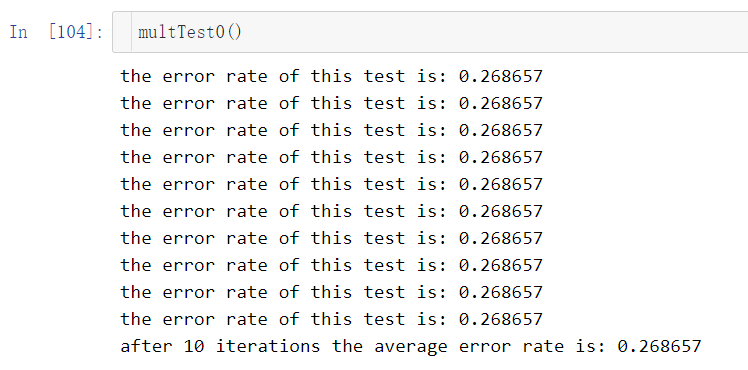

In [ ]:
multTest0()